# EXPLORATORY DATA ANALYSIS ON THE NEWS DATA

In [1]:
# Importin all the important modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from cleaner import DataCleaner
from assistants import assistant
from convert_txt2csv import converter
cleaner = DataCleaner()
assit = assistant()

In [3]:
converter("../data/Example_news_data.csv")

In [4]:
repo="https://github.com/michaelgetachew-abebe/Prompt-Engineering-LLMs.git"
news_dataframe=assit.read_from_dvc("data/Example_news_data.csv",repo,"843752fc4110b8d93005975500e38c5cab9c6474",low_memory=False)

In [5]:
print(news_dataframe.shape)
print(type(news_dataframe))

(999, 9)
<class 'pandas.core.frame.DataFrame'>


In [6]:
news_dataframe.head(12)

,Domain,Title,Description,Body,Link,timestamp,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,0.00,4.0,1.96
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,0.00,4.0,12.00
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,0.00,4.0,0.05
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,0.00,4.0,6.10
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,0.00,4.0,0.13
5,mype.co.za,Male arrested for the murder of an elderly fem...,…Crime Stamp Out…N1 and R101 roads appear in c...,South African Police Service Office of the Pro...,https://mype.co.za/new/male-arrested-for-the-m...,2021-09-10T00:17:46.055622,1.33,2.0,11.00
6,eminetra.co.za,7th Anniversary of SCOAN Collapse in Nigeria-S...,"…in Lagos, Nigeria, 84 South Africans were kil...",Today is the 7th anniversary [Tragic collapse ...,https://eminetra.co.za/7th-anniversary-of-scoa...,2021-09-12T05:17:50.279081,0.00,4.0,10.10
7,eminetra.co.za,The construction sector is expected to be boos...,"…additional spending on buildings, repairs and...",Construction activity grew steadily by 4% in t...,https://eminetra.co.za/the-construction-sector...,2021-09-09T09:02:46.320793,1.66,1.0,1.36
8,news24.com,News24.com | Court dismisses attempt by former...,…Lawsuit Against Public Participation) designe...,- Former Eskom CEO Matshela Moses Koko sought ...,https://www.news24.com/news24/southafrica/news...,2021-09-09T19:32:46.239682,0.33,3.0,2.40
9,manometcurrent.com,Global and Regional Beta-Carotene Market Resea...,…key players! – DSM – BASF – Allied Biotech – ...,Global and Regional Beta-Carotene Market Resea...,https://manometcurrent.com/global-and-regional...,2021-09-13T03:02:45.609228,0.00,4.0,0.22


In [7]:
#Handle the NaN values using dropna function
df = news_dataframe[:10]

In [9]:
df.count()

Domain                   10
Title                    10
Description              10
Body                     10
Link                     10
timestamp                10
Analyst_Average_Score    10
Analyst_Rank             10
Reference_Final_Score    10
dtype: int64

In [14]:
news_df = pd.DataFrame.from_records(df, columns =['Domain', 'Title', 'Description', 'Body', 'Link', 'timestamp', 'Analyst_Average_Score','Analyst_Rank','Reference_Final_Score'])

In [15]:
news_df

,Domain,Title,Description,Body,Link,timestamp,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,0.00,4.0,1.96
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,0.00,4.0,12.00
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,0.00,4.0,0.05
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,0.00,4.0,6.10
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,0.00,4.0,0.13
5,mype.co.za,Male arrested for the murder of an elderly fem...,…Crime Stamp Out…N1 and R101 roads appear in c...,South African Police Service Office of the Pro...,https://mype.co.za/new/male-arrested-for-the-m...,2021-09-10T00:17:46.055622,1.33,2.0,11.00
6,eminetra.co.za,7th Anniversary of SCOAN Collapse in Nigeria-S...,"…in Lagos, Nigeria, 84 South Africans were kil...",Today is the 7th anniversary [Tragic collapse ...,https://eminetra.co.za/7th-anniversary-of-scoa...,2021-09-12T05:17:50.279081,0.00,4.0,10.10
7,eminetra.co.za,The construction sector is expected to be boos...,"…additional spending on buildings, repairs and...",Construction activity grew steadily by 4% in t...,https://eminetra.co.za/the-construction-sector...,2021-09-09T09:02:46.320793,1.66,1.0,1.36
8,news24.com,News24.com | Court dismisses attempt by former...,…Lawsuit Against Public Participation) designe...,- Former Eskom CEO Matshela Moses Koko sought ...,https://www.news24.com/news24/southafrica/news...,2021-09-09T19:32:46.239682,0.33,3.0,2.40
9,manometcurrent.com,Global and Regional Beta-Carotene Market Resea...,…key players! – DSM – BASF – Allied Biotech – ...,Global and Regional Beta-Carotene Market Resea...,https://manometcurrent.com/global-and-regional...,2021-09-13T03:02:45.609228,0.00,4.0,0.22


In [16]:
news_df.describe()

,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
count,10.000000,10.000000,10.000000
mean,0.332000,3.400000,4.532000
std,0.626379,1.074968,4.834468
min,0.000000,1.000000,0.050000
25%,0.000000,3.250000,0.505000
50%,0.000000,4.000000,2.180000
75%,0.247500,4.000000,9.100000
max,1.660000,4.000000,12.000000


In [17]:
# make a little rearrange of columns

temp = news_df['Analyst_Average_Score']
news_df.drop('Analyst_Average_Score',axis=1,inplace=True)
news_df['Analyst_Average_Score']=temp
news_df.head()

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,4.0,1.96,0.0
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,4.0,12.00,0.0
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,4.0,0.05,0.0
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,4.0,6.10,0.0
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,4.0,0.13,0.0


<AxesSubplot:>

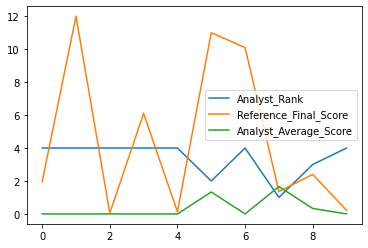

In [19]:
news_df.plot(kind='line')

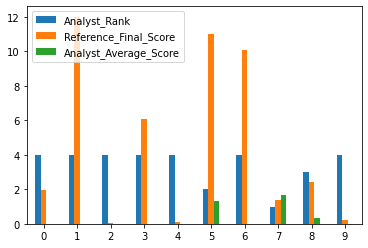

In [21]:
ax = news_df.plot.bar(rot=0)

In [23]:
cleaned=cleaner.clean_links(news_df,['Body'])
cleaned=cleaner.clean_symbols(cleaned_df,['Body','Description','Title'])
cleaned=cleaner.convert_to_datetime(cleaned_df,['timestamp'])
cleaned.head(5)

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer funded jet for ...,often trigger a protest vote that can upset t...,Boris Johnson using a taxpayer funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09 18:17:46.258006,4.0,1.96,0.0
1,twitter.com,Stumbled across an interesting case a woman f...,Stumbled across an interesting case a woman f...,Stumbled across an interesting case a woman f...,http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08 13:02:45.802298,4.0,12.00,0.0
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,COVID 19 COVID COVID COVID 19 et Post COVID C...,Le rapport d étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13 07:32:46.244403,4.0,0.05,0.0
3,badbluetech.bitnamiapp.com,AI drives data analytics surge study finds,hate raiders linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11 00:17:45.962605,4.0,6.10,0.0
4,kryptogazette.com,Triacetin Vertrieb Markt 2021 Globale Unterne...,Abschnitten und Endanwendungen Organisation...,Global Triacetin Vertrieb Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08 12:47:46.078369,4.0,0.13,0.0


In [24]:
cleaned.to_csv('../data/cleaned_news.csv', index = False)